In [14]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('road_accident_data_by_vehicle_type.csv')

In [16]:
df.head()

,Location,Motor Car,Dual Purpose Vehicle,Lorry,Cycle,Motor Cycle/Moped,Three wheeler,"Articulated Vehicle, prime mover",SLT Bus,Private Bus,Intercity Bus,Land Vehicle/Tractor,Animal drawn vehicle or rider on animal,Other
0,Ampara,59,102,121,93,575,169,4,15,35,1,41,4,0
1,Anuradhapura,116,224,246,158,845,196,2,28,104,3,72,0,6
2,Badulla (Badulla & Bandarawela Divisions),82,121,171,20,266,219,2,58,78,1,16,0,5
3,Batticaloa,26,43,30,64,224,52,4,9,25,1,24,1,2
4,Chilaw (Chilaw & Puttalam Divisions),102,213,224,134,530,163,14,23,84,1,19,1,3


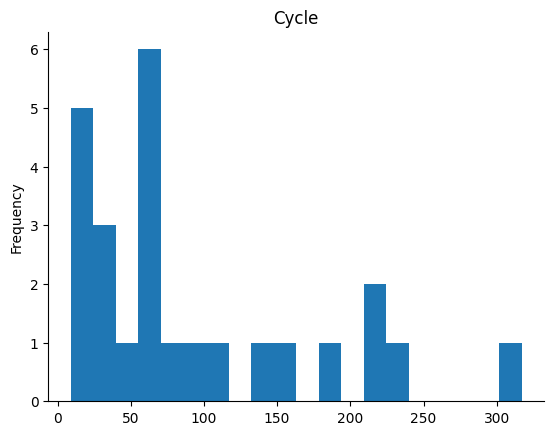

In [17]:
df['Cycle'].plot(kind='hist', bins=20, title='Cycle')
plt.gca().spines[['top', 'right',]].set_visible(False)

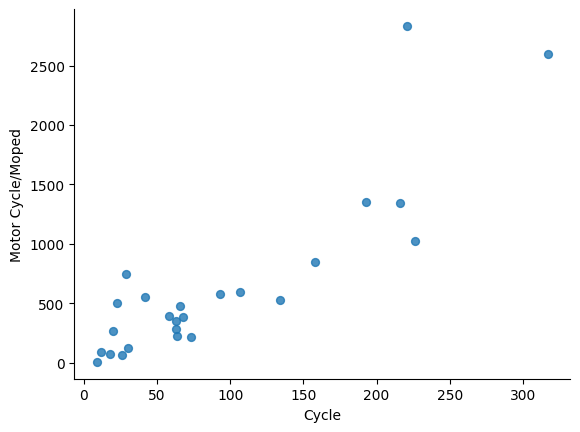

In [18]:
df.plot(kind='scatter', x='Cycle', y='Motor Cycle/Moped', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

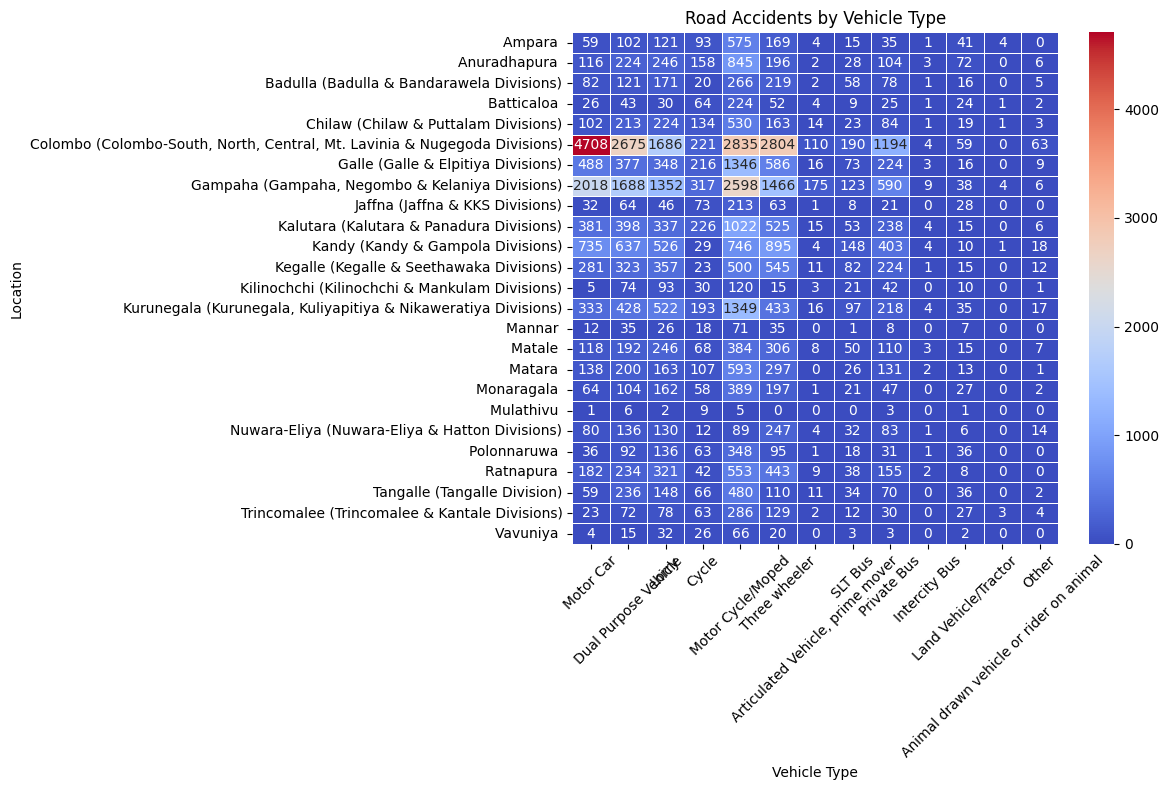

In [20]:
df.set_index('Location', inplace=True)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df, cmap='coolwarm', annot=True, fmt='d', linewidths=0.5)
plt.title('Road Accidents by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Location')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

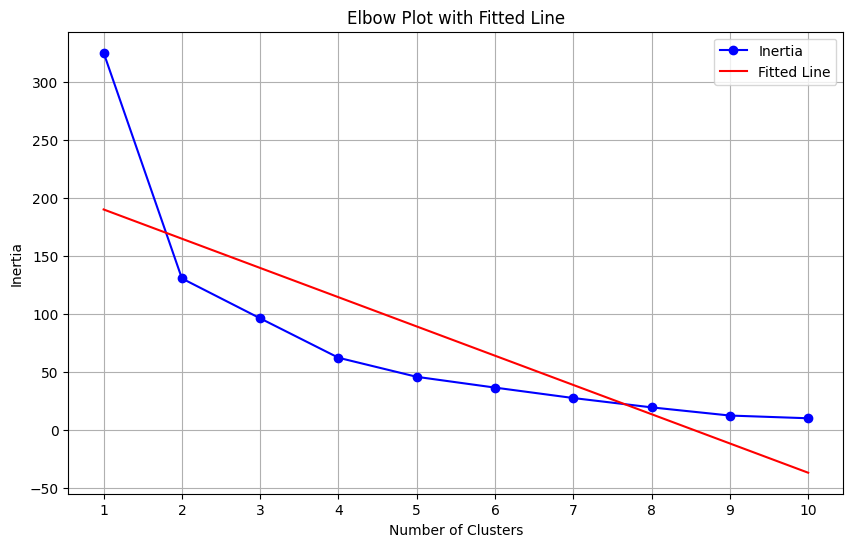

In [27]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.optimize import curve_fit

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

def line(x, a, b):
    return a * x + b

popt, _ = curve_fit(line, range(1, 11), inertia)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b', label='Inertia')
plt.plot(range(1, 11), line(np.array(range(1, 11)), *popt), color='r', label='Fitted Line')
plt.title('Elbow Plot with Fitted Line')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.legend()
plt.show()
